#Exploratory Data Analysis and Hypothesis Testing:IMDB Movie Dataset

This dataset contains movie-related information.A film's commercial success is determined by a variety of elements such as the director, actors, reviews from critics, and audience reaction. The IMDB score is a significant aspect in determining the success of a film.

The dataset provides extensive information about the movies as well as their IMDB ratings. We will study all the aspects that influence IMDB ratings to forecast better results. The movie with a higher IMDB score is more successful than the movie with a lower IMDB score.
With budget constraints in mind, this study makes recommendations for increasing the revenue from our next film project.

In [ ]:
#Importing all the relevent modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
 

**Reading and Inspection**:

The movie database should be imported and read. Create a variable named movies to hold it.

In [ ]:
# Read the csv file using 'read_csv'
movies = pd.read_csv('/content/drive/MyDrive/movie_metadata.csv')




In [ ]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


**Examine the dataframe**:

Analyze the dataframe's columns, shapes, and variable types.

In [ ]:
#Analyze the dataframe's rows and columns

movies.shape

(5043, 28)

In [ ]:
#Review the column-by-column dataframe information

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
#Use 'describe()' to get a summary of the dataframe

movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


**The Data Cleaning Process**:

Inspect Null values-Determine out how many columns and rows contain Null values. Find the proportion of Null values in each column.
The percentages are then rounded to the nearest two decimal places.

In [ ]:
#Use the functions "is.null()" and "sum()" to obtain the column-wise Null count.

movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
#Calculate the row-wise null counts similarly. Specify the axis as 1 this time.

movies.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [ ]:
# Get the percentages by dividing the sum acquired previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places

round(100*(movies.isnull().sum()/len(movies.index)), 2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

**Eliminate unnecessary columns**:

For this task, you will mostly be examining films in terms of their ratings, box office success, popularity, etc. In this data frame, a large number of columns are not necessary. Deleting the following columns is therefore advised.

color,
director_facebook_likes,
actor_1_facebook_likes,
actor_2_facebook_likes,
actor_3_facebook_likes,
actor_2_name,
cast_total_facebook_likes,
actor_3_name,
duration,
facenumber_in_poster,
content_rating,
country,
movie_imdb_link,
aspect_ratio,
plot_keywords.

In [ ]:
#To remove the unneeded columns, use the 'drop()' function.
movies = movies.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes', 
                      'duration', 
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      'actor_2_name',
                      'actor_3_name'], 
                       axis = 1)
movies


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,6.0,English,NaN,2013.0,7.7,84
5039,NaN,43.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,359.0,English,NaN,NaN,7.5,32000
5040,Benjamin Roberds,13.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,3.0,English,1400.0,2013.0,6.3,16
5041,Daniel Hsia,14.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,9.0,English,NaN,2012.0,6.3,660


In [ ]:
#Examine the data set. There are now just 13 columns shown.

movies.shape

(5043, 13)

**Using columns with high NaN percentages, remove unnecessary rows**:

If you look closely, you can see that some columns contain a high percentage of Null values (more than 5%). Remove all rows with Null values for these columns.

In [ ]:
#examining the percentages of Null values again

round(100*(movies.isnull().sum()/len(movies.index)), 2)

director_name              2.06
num_critic_for_reviews     0.99
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [ ]:
#Use NumPy's "isnan" function and the negation "~" to remove all rows with NaN values from the "gross" and "budget" columns, which contain a high percentage of NaN values.

movies = movies[~np.isnan(movies['gross'])]
movies = movies[~np.isnan(movies['budget'])]
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,7000.0,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,9000.0,2011.0,6.4,413


In [ ]:
#examining the percentages of Nans

round(100*(movies.isnull().sum()/len(movies.index)), 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

**Fill in NaN values**:

You could have noticed some NaN values in the language column. If you look closely, you'll see that it's okay to enter "English" in place of each missing value.

In [ ]:
#Examine the language column in the data set.

movies['language'].describe()

count        3888
unique         38
top       English
freq         3707
Name: language, dtype: object

In [ ]:
#Since most movies are in the English language, enter "English" for the NaN values.

movies.loc[pd.isnull(movies['language']), ['language']] = 'English'
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,7000.0,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,9000.0,2011.0,6.4,413


In [ ]:
#examining the percentages of Nans
round(100*(movies.isnull().sum()/len(movies.index)), 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

**Verify the number of rows retained**:

As you can see, two columns, viz. actor_1_name, and num_critic_for_reviews has minor percentages of NaN values. You can leave these columns for the time being. Once you've finished all the preceding actions, count how many rows retained and what percentage.

In [ ]:
#Using "len()," find the number of rows retained.
#By dividing the current number of rows by the initial number of rows, you may determine the percentage of retained rows.

print(len(movies.index))
print(len(movies.index)/5042)

3891
0.771717572391908


In [ ]:
#Create a new column named profit that holds the difference between the gross and budget columns.
movies['profit'] = movies['gross'] - movies['budget']


In [ ]:
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000,-190641321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,7000.0,2004.0,7.0,19000,417760.0
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,7000.0,2005.0,6.3,74,63071.0
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,7000.0,1992.0,6.9,0,2033920.0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,9000.0,2011.0,6.4,413,-4416.0


Using the profit column as a guide, sort the dataframe.

In [ ]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
# 'ascending' to 'False'

movies = movies.sort_values(by = 'profit', ascending = False)
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,2.370000e+08,2009.0,7.9,33000,5.235058e+08
29,Colin Trevorrow,644.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,1.500000e+08,2015.0,7.0,150000,5.021773e+08
26,James Cameron,315.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,2.000000e+08,1997.0,7.7,26000,4.586723e+08
3024,George Lucas,282.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,1.100000e+07,1977.0,8.7,33000,4.499357e+08
3080,Steven Spielberg,215.0,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,1.050000e+07,1982.0,7.9,34000,4.244495e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79.0,Japanese,2.127520e+09,2004.0,6.9,973,-2.127110e+09
2323,Hayao Miyazaki,174.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2.400000e+09,1997.0,8.4,11000,-2.397702e+09
3005,Lajos Koltai,73.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,45.0,Hungarian,2.500000e+09,2005.0,7.1,607,-2.499804e+09
3859,Chan-wook Park,202.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131.0,Korean,4.200000e+09,2005.0,7.7,4000,-4.199788e+09


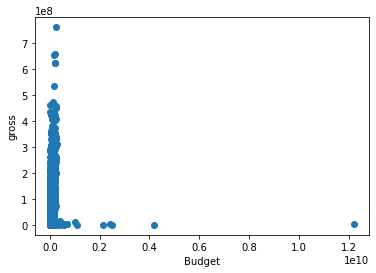

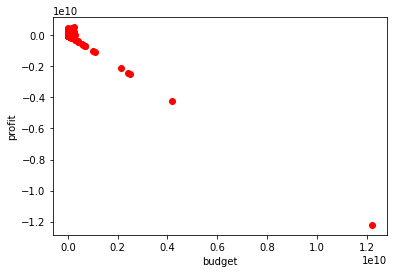

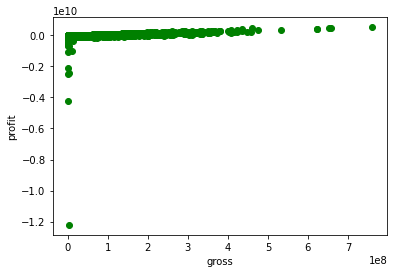

In [ ]:
#By creating a scatter plot between these features, we can see how the gross, budget, and profit relate to one another.

plt.scatter(movies['budget'],movies['gross'])# plot between budget and gross
plt.xlabel('Budget')
plt.ylabel('gross')
plt.show()
plt.scatter(movies['budget'],movies['profit'] , c = 'red')#plot between budget and profit
plt.xlabel('budget')
plt.ylabel('profit')
plt.show()
plt.scatter(movies['gross'],movies['profit'], c= 'green' )#plot between gross and profit
plt.xlabel('gross')
plt.ylabel('profit')
plt.show()


We can draw numerous significant conclusions from the above graph, such as:
1. As the budget increases, profits don't increase
2. Profit and gross revenue are positively correlated.
3. The budget is unrelated to the gross
The graph also shows that certain points are placed at its extremity, distant from the other sets of points. These are the data outliers.

In [ ]:
#Let's see if we can use any of the most frequent genre types found in the data set available.

dict_ ={}
#Function to create a frequency distribution of the different genres available in the dataset.
def count_function(dataframe): 
  for i in dataframe['genres']:
    dict_[i] = dict_.get(i,0)+1
  return dict_

The most common genres found in the available data set are listed in the section below.

In [ ]:
 genre_count = count_function(movies)
 genre_count
 dict_ = {}#to make dict_ empty again, otherwise the count will increase each time you run the cell
 import nltk
 from nltk.probability import FreqDist
 genre_count = FreqDist(genre_count) #could have taken the most_common genre without using FreqDist
 most_common_genres = genre_count.most_common(10)
 most_common_genres #To find the most common genres in the available data set
 df=pd.DataFrame(most_common_genres, columns = ['Top_frequent_Genre','Number_of_Movies'])
 df

,Top_frequent_Genre,Number_of_Movies
0,Drama,154
1,Comedy|Drama|Romance,151
2,Comedy|Drama,148
3,Comedy,147
4,Comedy|Romance,136
5,Drama|Romance,120
6,Crime|Drama|Thriller,83
7,Action|Crime|Thriller,56
8,Action|Crime|Drama|Thriller,50
9,Action|Adventure|Sci-Fi,48


Analyze the budgets of these films, which are seen the most.

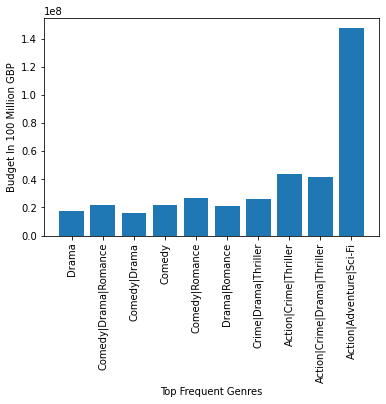

In [ ]:
#in the next line column value aggregation is done (with groupby) and mean is calculated so that 'topgenseries' dataframe can be created
topgenreseries = movies.groupby('genres')[['budget','imdb_score','gross','profit']].mean()
df2=pd.DataFrame(topgenreseries['budget'][df['Top_frequent_Genre']])
df2
plt.bar(df2.index,df2['budget'])
plt.xticks(rotation = 90)
plt.xlabel('Top Frequent Genres')
plt.ylabel('Budget In 100 Million GBP')
plt.show()
#plt.bar(df2.index,df2['budget'])

Given that our budget has a ceiling of 1,500,000 GBP, it is clear from the analysis above that the most popular genres in the data set that is currently available are not within our means. However, there is a significant chance of making successful movies in these genres if we can get additional money. Let's now allocate the current budget for the movie, presuming that we will only use it for that one movie.

In [ ]:
max_budget = 1500000
df_final=movies[movies['budget']<= max_budget]
df_final.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
4707,Daniel Myrick,360.0,140530114.0,Horror,Heather Donahue,The Blair Witch Project,186786,3400.0,English,60000.0,1999.0,6.4,0,140470114.0
4530,John G. Avildsen,141.0,117235247.0,Drama|Sport,Sylvester Stallone,Rocky,375240,542.0,English,960000.0,1976.0,8.1,0,116275247.0
4674,George Lucas,100.0,115000000.0,Comedy|Drama|Music,Harrison Ford,American Graffiti,63839,238.0,English,777000.0,1973.0,7.5,0,114223000.0
4793,Oren Peli,409.0,107917283.0,Horror,Micah Sloat,Paranormal Activity,184824,1189.0,English,15000.0,2007.0,6.3,12000,107902283.0
4485,James Wan,287.0,55153403.0,Horror|Mystery|Thriller,Michael Emerson,Saw,299127,1509.0,English,1200000.0,2004.0,7.7,0,53953403.0


Further analysis provides the data frame below, which lists the genres whose mean budgets are below our present budgetary constraints.

In [ ]:
#in the next line column value aggregation is done (with groupby) and mean is calculated so that 'budget_genres' dataframe can be created
budget_genres = df_final.groupby('genres')[['budget','imdb_score','gross','profit']].mean() 
budget_genres = budget_genres.sort_values('profit', ascending = False)
budget_genres.head(8)

,budget,imdb_score,gross,profit
genres,,,,
Comedy|Drama|Music,8.385000e+05,6.850000,6.200000e+07,6.116150e+07
Fantasy|Horror|Mystery|Thriller,1.500000e+06,6.800000,5.399114e+07,5.249114e+07
Horror,5.892857e+05,6.042857,4.571186e+07,4.512257e+07
Adventure|Family|Romance,5.000000e+05,6.100000,3.955260e+07,3.905260e+07
Horror|Thriller,1.945107e+05,7.150000,3.757930e+07,3.738479e+07
Horror|Mystery|Thriller,1.064237e+06,7.000000,3.444768e+07,3.338344e+07
Adventure|Biography|Drama|Horror|Thriller,5.000000e+05,5.700000,3.050088e+07,3.000088e+07
Drama|Sport,5.920000e+05,6.700000,2.605764e+07,2.546564e+07


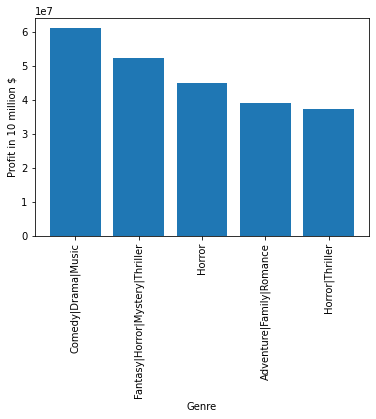

In [ ]:
%matplotlib inline
from matplotlib.pyplot import figure
plt.bar(budget_genres.index[:5] , budget_genres['profit'][:5]) # To show the profit of top 5 genres within the budget limit
plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Profit in 10 million $')
plt.show()

This output may lead us to believe that the comedy, drama, and music genres are the best ones to concentrate on for our future films. However, a closer inspection reveals that the final dataset contains just two such film datasets.

In [ ]:
df_final[df_final['genres']== 'Comedy|Drama|Music']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
4674,George Lucas,100.0,115000000.0,Comedy|Drama|Music,Harrison Ford,American Graffiti,63839,238.0,English,777000.0,1973.0,7.5,0,114223000.0
4546,Russ Meyer,101.0,9000000.0,Comedy|Drama|Music,Charles Napier,Beyond the Valley of the Dolls,7584,137.0,English,900000.0,1970.0,6.2,0,8100000.0


Therefore, we must further examine the number of films in each category. The better it is to develop a compelling argument, the more movies there are in each genre.

In [ ]:
genre_count2 = count_function(df_final)
dict_ = {} # to make the dict_ empty, other wise if we execute the cell again the count will increase
list_final=[(i, genre_count2[i]) for i in budget_genres.index]
# The code below is to convert the above list into a dictionary form
dict_1 = {}
for i in list_final:
  dict_1[i[0]] = i[1]
dict_1
dict_1 = FreqDist(dict_1) #To get the most frequent genres easily, converted dictionary to a frequency distribution
dict_1.most_common(15)# Most common 15 genres in the available budget
df3 = pd.DataFrame(dict_1.most_common(15), columns = ['Genres','Number of movies'])
df3

,Genres,Number of movies
0,Drama,31
1,Comedy|Drama,22
2,Comedy|Drama|Romance,19
3,Documentary,15
4,Comedy,13
5,Drama|Romance,11
6,Comedy|Romance,10
7,Crime|Drama|Thriller,9
8,Horror,7
9,Horror|Thriller,6


By closely examining budget_genres and df3, we can see that movies with a horror component are more profitable and that there are a respectable number of horror movies in the final data. Now let's use this factor to determine the film genre.

In [ ]:
list_2 = []
for i in df3['Genres']:
  if re.findall(r'Horror',i) == ['Horror']:
    list_2.append(i)
list_2

['Horror', 'Horror|Thriller', 'Horror|Mystery|Thriller', 'Fantasy|Horror']

According to the preceding list, horror and horror thriller are the most popular genres in both budget_genres and df3.

In [ ]:
df_horror = budget_genres.loc[['Horror','Horror|Thriller'],:]
df_horror

,budget,imdb_score,gross,profit
genres,,,,
Horror,589285.714286,6.042857,4.571186e+07,4.512257e+07
Horror|Thriller,194510.666667,7.150000,3.757930e+07,3.738479e+07


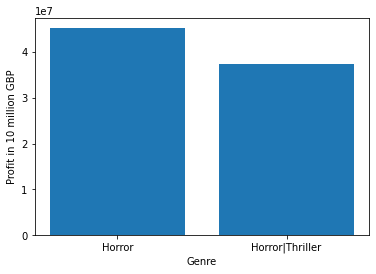

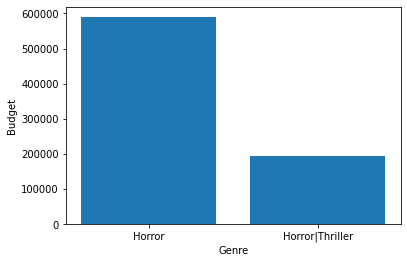

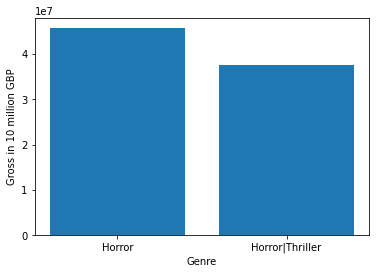

In [ ]:
%matplotlib inline
plt.bar(df_horror.index, df_horror['profit']) #to plot between genre and profit
plt.xlabel('Genre')
plt.ylabel('Profit in 10 million GBP')
plt.show()
plt.bar(df_horror.index,df_horror['budget']) #to plot between genre and budget
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.show()
plt.bar(df_horror.index,df_horror['gross']) #to plot between genre and gross 
plt.xlabel('Genre')
plt.ylabel('Gross in 10 million GBP')
plt.show()

In [ ]:
profit_diff = df_horror.loc['Horror'][3] - df_horror.loc['Horror|Thriller'][3]
budget_diff = df_horror.loc['Horror'][0] - df_horror.loc['Horror|Thriller'][0]
print('The average profit differnce between Horror and Horror|Thriller genre is {}'.format(profit_diff))
print('The average budget differnce between Horror and Horror|Thriller genre is {}'.format(budget_diff))

The average profit differnce between Horror and Horror|Thriller genre is 7737778.785714284
The average budget differnce between Horror and Horror|Thriller genre is 394775.0476190477


Based on the study above, and assuming we can only make one movie, I suggest making a horror movie. To determine whether the higher profit generated by the horror movie is statistically significant, we must still conduct hypothesis testing.

# Hypothesis testing

**If** horror movies make higher profit, **then** average profit will be grater for horror movies.

**H0**  : Average profit for horror movies are same as average of other genre **U1** - **U2** **=** **0**

**H1** : Average profit for horror movies are greater than average of other genre **U1** - **U2 > 0**

In this instance, we test our hypothesis for 2 groups,df_final1['profit'] and df_final2['profit']

We will use a **t-test** in this instance because the sample size is too small to perform a z-test. Additionally, because neither of the groups we are considering has the same sample size, we cannot assume the same variance (therefore, we cannot apply the student's t-test). 
**Welch's t-test** will be used.

In [ ]:
df_final1 = df_final[df_final['genres']!= 'Horror']
df_final2 = df_final[df_final['genres'] =='Horror']
print('The mean profit for all genre other than Horror = {}'.format(np.mean(df_final1['profit'])))
print('The mean profit of Horror genre = {}'.format(np.mean(df_final2['profit'])))

The mean profit for all genre other than Horror = 4437006.108303249
The mean profit of Horror genre = 45122571.28571428


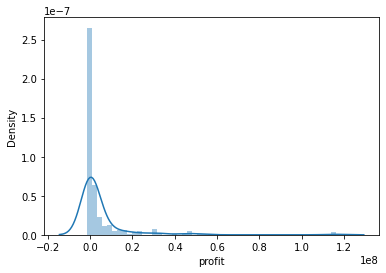

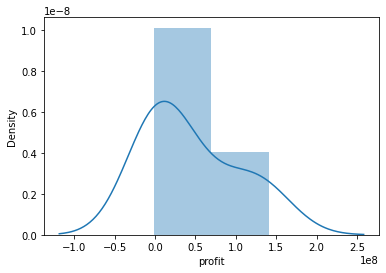

In [ ]:
import warnings
warnings.filterwarnings("ignore") #to ignore the future warning of distribution plot
sn.distplot(df_final1['profit']) #for getting the distribution plot for 'profit'from genres other than horror
plt.show()
sn.distplot(df_final2['profit'])#for getting the distribution plot for 'profit' from Horror genre
plt.show()

In [ ]:
def hypothesis_testing(data1,data2):
  alpha = [0.01, 0.05, 0.1] #common values for significance level
  from scipy.stats import ttest_ind
  stat,p_value = ttest_ind(data1,data2, equal_var= False)
  print(p_value/2)#since we are doing single tail test, we need only p_value/2
  for i in alpha:
    if p_value/2 < i:
      print('Reject the Null Hypothesis H0 at {} % significance level'.format(i*100))
      break
    else:
      print('Failed to reject the Null Hypothesis H0 at {} % significance level'.format(i*100))

In [ ]:
hypothesis_testing(df_final2['profit'],df_final1['profit'])

0.05630870509195648
Failed to reject the Null Hypothesis H0 at 1.0 % significance level
Failed to reject the Null Hypothesis H0 at 5.0 % significance level
Reject the Null Hypothesis H0 at 10.0 % significance level


With a 90% confidence interval, the results of the preceding hypothesis test indicate that producing a horror film can yield more profits than the average for other movie genres.

# Summary

An exploratory analysis is carried out on the existing data set to determine which movie genre should be first in order to maximise profit within the given budget. First, I cleaned and wrangled the data and evaluated the rough connection between characteristics so we could delete irrelevant features. Further investigation revealed that several popular genres were out of reach due to budget constraints.

The data is further examined, and the top genres with the highest profit margins are identified. However, several of these genres have a small number of films, making the study based on such a small sample size unreliable. To counter this, movie genres with large sample sizes and high profits got identified. Among such film genres, horror film gets recommended due to their relatively high return on investment.

Finally, I conducted hypothesis testing and discovered that I could suggest the Horror movie genre with a 90% confidence interval.

**Refernces:**

https://www.kaggle.com/code/kirankarthikeyan/eda-and-hypothesis-testing

https://github.com/Indureghu/Exploratory-Data-Analysis-of-IMDB-movie-dataset/blob/main/DS%2Bin%2BPython%2BIMDb%20Movie.ipynb

https://github.com/sohamjoshi1998/IMDb_Movie_Data_Analysis/blob/main/IMDb%2BMovie%2BAssignment_Soham_Joshi.ipynb